In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# lectura de archivos

In [2]:
df = pd.read_csv('covid_worldwide.csv')

In [3]:
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


# Forma del dataset

In [4]:
df.shape

(231, 8)

# Información del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


# Eliminar elementos con tipo de dato diferente

como se puede ver en la celda anterior, la columna con tipo de dato 
diferente es la 'Serial Number' por lo cual procedemoa a eliminarla

In [6]:
df = df.drop('Serial Number', axis=1)

In [7]:
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
226,Diamond Princess,712,13,699,0,NaN,NaN
227,Vatican City,29,NaN,29,0,NaN,799
228,Western Sahara,10,1,9,0,NaN,"626,161"
229,MS Zaandam,9,2,7,0,NaN,NaN


# Datos nulos en más del 50% de datos nulos

In [8]:
# Revisamos los datos nulos por columna
datos_nulos = df.isnull().sum()

In [9]:
datos_nulos

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [10]:
# Posterior a ellos validamos el porcentaje de los datos nulos con respecto a todos los valores de cada columna

porcentaje_nulos = df.isnull().sum() / len(df) * 100

In [11]:
porcentaje_nulos

Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64

# Revisar si hay países duplicados

In [12]:
df['Country'].nunique()

231

In [13]:
df.shape

(231, 7)

In [14]:
new_duplicate = df[df.duplicated('Country', False)]

In [15]:
new_duplicate

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population


No hay paises duplicado debia que el df.shape y el df.unique son iguales

# Porcentaje de pacientes que murieron por cada país

In [16]:
df['Total Deaths'] = df['Total Deaths'].str.replace(',', '')

In [17]:
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')

In [18]:
df['Total Cases'] = df['Total Cases'].str.replace(',', '')

In [19]:
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')

In [20]:
df['% Deaths'] = df['Total Deaths'] / df['Total Cases'] * 100

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total Cases      231 non-null    int64  
 2   Total Deaths     225 non-null    float64
 3   Total Recovered  210 non-null    object 
 4   Active Cases     212 non-null    object 
 5   Total Test       213 non-null    object 
 6   Population       228 non-null    object 
 7   % Deaths         225 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 14.6+ KB


In [22]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,% Deaths
0,USA,104196861,1132935.0,"101,322,779","1,741,147","1,159,832,679","334,805,269",1.087302
1,India,44682784,530740.0,"44,150,289","1,755","915,265,788","1,406,631,776",1.187795
2,France,39524311,164233.0,"39,264,546","95,532","271,490,188","65,584,518",0.415524
3,Germany,37779833,165711.0,"37,398,100","216,022","122,332,384","83,883,596",0.438623
4,Brazil,36824580,697074.0,"35,919,372","208,134","63,776,166","215,353,593",1.892958


# Top 10 de países con más cantidad de muertos

In [23]:
tabla_1 = df.nlargest(10, 'Total Deaths')

In [24]:
tabla_1

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,% Deaths
0,USA,104196861,1132935.0,"101,322,779","1,741,147","1,159,832,679","334,805,269",1.087302
4,Brazil,36824580,697074.0,"35,919,372","208,134","63,776,166","215,353,593",1.892958
1,India,44682784,530740.0,"44,150,289","1,755","915,265,788","1,406,631,776",1.187795
9,Russia,21958696,395108.0,"21,356,008","207,580","273,400,000","145,805,947",1.799324
18,Mexico,7368252,332198.0,"6,606,633","429,421","19,356,195","131,562,772",4.508505
34,Peru,4481621,218931.0,"4,258,688","4,002","37,754,603","33,684,208",4.885085
8,UK,24274361,204171.0,"24,020,088","50,102","522,526,476","68,497,907",0.841097
7,Italy,25453789,186833.0,"25,014,986","251,970","265,478,247","60,262,770",0.734009
3,Germany,37779833,165711.0,"37,398,100","216,022","122,332,384","83,883,596",0.438623
2,France,39524311,164233.0,"39,264,546","95,532","271,490,188","65,584,518",0.415524


# Los 10 países con menos muertos

In [25]:
tabla_2 = df.nsmallest(10, 'Total Deaths')

In [26]:
tabla_2

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,% Deaths
216,Nauru,4621,1.0,"4,609",11,"20,509","10,903",0.021640
228,Western Sahara,10,1.0,9,0,NaN,"626,161",10.000000
209,Cook Islands,7011,2.0,"6,993",16,"19,690","17,571",0.028527
219,Saint Pierre Miquelon,3452,2.0,"2,449","1,001","25,400","5,759",0.057937
229,MS Zaandam,9,2.0,7,0,NaN,NaN,22.222222
214,St. Barth,5420,6.0,NaN,NaN,"78,646","9,945",0.110701
220,Wallis and Futuna,3427,7.0,438,"2,982","20,508","10,982",0.204260
224,Montserrat,1403,8.0,"1,376",19,"17,762","4,965",0.570207
213,Palau,5986,9.0,"5,976",1,"68,820","18,233",0.150351
217,Anguilla,3904,12.0,"3,879",13,"51,382","15,230",0.307377


# 10 países con más pacientes recuperados

In [27]:
df['Total Recovered'] = df['Total Recovered'].str.replace(',', '')

In [28]:
df['Total Recovered'] = pd.to_numeric(df['Total Recovered'], errors='coerce')

In [29]:
tabla_3 = df.nlargest(10, 'Total Recovered')

In [30]:
tabla_3

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,% Deaths
0,USA,104196861,1132935.0,101322779.0,"1,741,147","1,159,832,679","334,805,269",1.087302
1,India,44682784,530740.0,44150289.0,"1,755","915,265,788","1,406,631,776",1.187795
2,France,39524311,164233.0,39264546.0,"95,532","271,490,188","65,584,518",0.415524
3,Germany,37779833,165711.0,37398100.0,"216,022","122,332,384","83,883,596",0.438623
4,Brazil,36824580,697074.0,35919372.0,"208,134","63,776,166","215,353,593",1.892958
6,S. Korea,30197066,33486.0,29740877.0,"422,703","15,804,065","51,329,899",0.110892
7,Italy,25453789,186833.0,25014986.0,"251,970","265,478,247","60,262,770",0.734009
8,UK,24274361,204171.0,24020088.0,"50,102","522,526,476","68,497,907",0.841097
5,Japan,32588442,68399.0,21567425.0,"10,952,618","92,144,639","125,584,838",0.209887
9,Russia,21958696,395108.0,21356008.0,"207,580","273,400,000","145,805,947",1.799324


# Gráficas

Text(0, 0.5, 'Total Deaths')

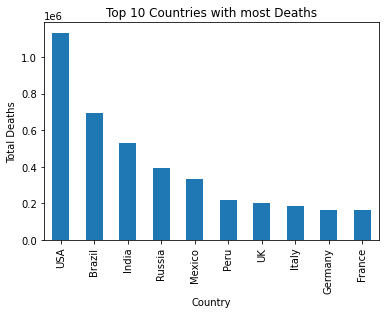

In [31]:
tabla_1.plot.bar(
    x='Country',
    y='Total Deaths',
    legend=None)

plt.title("Top 10 Countries with most Deaths")
plt.xlabel('Country')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

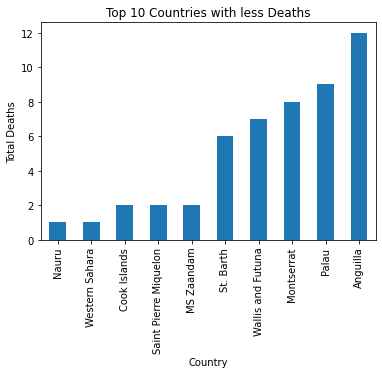

In [32]:
tabla_2.plot.bar(
    x='Country',
    y='Total Deaths',
    legend=None)

plt.title("Top 10 Countries with less Deaths")
plt.xlabel('Country')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

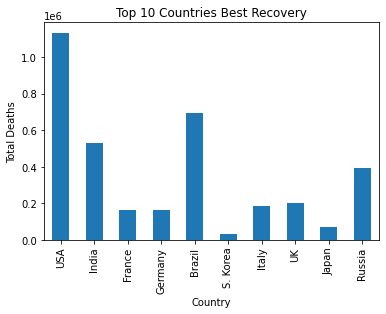

In [33]:
tabla_3.plot.bar(
    x='Country',
    y='Total Deaths',
    legend=None)

plt.title("Top 10 Countries Best Recovery")
plt.xlabel('Country')
plt.ylabel('Total Deaths')

# libreria px.scatter_geo para mostrar los casos en un mapa

In [36]:
#filtramos por los datos que no sean nulos en la columna del total de casos de covid
df_map = df[~df['Total Cases'].isnull()]

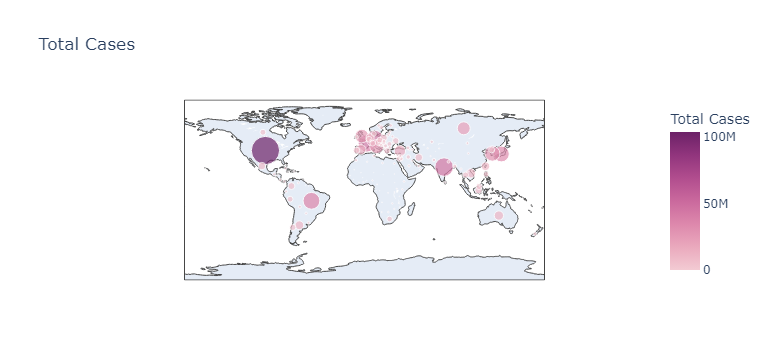

In [47]:
plot = px.scatter_geo(
    df_map, 
    locations='Country', 
    locationmode='country names',
    size='Total Cases',
    title='Total Cases',
    color='Total Cases',
    color_continuous_scale='magenta')

plot.show()